# Chapter 14 - Data Analysis Examples

Now that we’ve reached the end of this book’s main chapters, we’re going to take a
look at a number of real-world datasets. For each dataset, we’ll use the techniques
presented in this book to extract meaning from the raw data. The demonstrated techniques can be applied to all manner of other datasets, including your own. This chapter contains a collection of miscellaneous example datasets that you can use for
practice with the tools in this book.

The example datasets are found in the book’s accompanying GitHub repository.

In [1]:
%matplotlib notebook

## 14.1 1.USA.gov Data from Bitly

In 2011, URL shortening service Bitly partnered with the US government website
USA.gov to provide a feed of anonymous data gathered from users who shorten links
ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available
as downloadable text files. This service is shut down at the time of this writing (2017),
but we preserved one of the data files for the book’s examples.

In the case of the hourly snapshots, each line in each file contains a common form of
web data known as JSON, which stands for JavaScript Object Notation. For example,
if we read just the first line of a file we may see something like this:

In [1]:
path = 'datasets/bitly_usagov/example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python has both built-in and third-party libraries for converting a JSON string into a
Python dictionary object. Here we’ll use the json module and its loads function
invoked on each line in the sample file we downloaded:

In [3]:
import json

In [4]:
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [7]:
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [8]:
len(records)

3560

The resulting object records is now a list of Python dicts:

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python

Suppose we were interested in finding the most often-occurring time zones in the
dataset (the tz field). There are many ways we could do this. First, let’s extract a list of
time zones again using a list comprehension:

In [10]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

Oops! Turns out that not all of the records have a time zone field. This is easy to han‐
dle, as we can add the check if 'tz' in rec at the end of the list comprehension:

In [11]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [12]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [13]:
type(time_zones)

list

Just looking at the first 10 time zones, we see that some of them are unknown (empty
string). You can filter these out also, but I’ll leave them in for now. Now, to produce
counts by time zone I’ll show two approaches: the harder way (using just the Python
standard library) and the easier way (using pandas). One way to do the counting is to
use a dict to store counts while we iterate through the time zones:

In [15]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1 # Update value of key 'x'.
        else:
            counts[x] = 1  # Add new key 'x'.
    return counts          # Return dict of {'time zone': count (freq)}.

Using more advanced tools in the Python standard library, you can write the same
thing more briefly:

In [16]:
from collections import defaultdict

In [17]:
def get_counts2(sequence):
    counts = defaultdict(int) # Values will initialize to 0.
    for x in sequence:
        counts[x] += 1
    return counts

I put this logic in a function just to make it more reusable. To use it on the time
zones, just pass the time_zones list:

In [18]:
counts = get_counts(time_zones)

In [21]:
counts.items()

dict_items([('America/New_York', 1251), ('America/Denver', 191), ('America/Sao_Paulo', 33), ('Europe/Warsaw', 16), ('', 521), ('America/Los_Angeles', 382), ('Asia/Hong_Kong', 10), ('Europe/Rome', 27), ('Africa/Ceuta', 2), ('Europe/Madrid', 35), ('Asia/Kuala_Lumpur', 3), ('Asia/Nicosia', 1), ('Europe/London', 74), ('Pacific/Honolulu', 36), ('America/Chicago', 400), ('Europe/Malta', 2), ('Europe/Lisbon', 8), ('Europe/Paris', 14), ('Europe/Copenhagen', 5), ('America/Mazatlan', 1), ('Europe/Dublin', 3), ('Europe/Brussels', 4), ('America/Vancouver', 12), ('Europe/Amsterdam', 22), ('Europe/Prague', 10), ('Europe/Stockholm', 14), ('America/Anchorage', 5), ('Asia/Bangkok', 6), ('Europe/Berlin', 28), ('America/Rainy_River', 25), ('Europe/Budapest', 5), ('Asia/Tokyo', 37), ('Europe/Vienna', 6), ('America/Phoenix', 20), ('Asia/Jerusalem', 3), ('Asia/Karachi', 3), ('America/Bogota', 3), ('America/Indianapolis', 20), ('America/Montreal', 9), ('Asia/Calcutta', 9), ('Europe/Skopje', 1), ('Asia/Beirut

In [19]:
counts['America/New_York']

1251

In [20]:
len(time_zones)

3440

If we wanted the top 10 time zones and their counts, we can do a bit of dictionary
acrobatics:

In [24]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort() # Sorting by increasing value of count.
    return value_key_pairs[-n:]

We have then :

In [25]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

If you search the Python standard library, you may find the collections.Counter
class, which makes this task a lot easier:

In [27]:
from collections import Counter

In [28]:
counts = Counter(time_zones)

In [29]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

Creating a DataFrame from the original set of records is as easy as passing the list of
records to pandas.DataFrame:

In [30]:
import pandas as pd

In [33]:
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

In [35]:
frame = pd.DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [36]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [37]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

The output shown for the frame is the summary view, shown for large DataFrame
objects. We can then use the value_counts method for Series:

In [38]:
tz_counts = frame['tz'].value_counts()

In [39]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

We can visualize this data using matplotlib. You can do a bit of munging to fill in a
substitute value for unknown and missing time zone data in the records. We replace
the missing values with the fillna method and use boolean array indexing for the
empty strings:

In [40]:
clean_tz = frame['tz'].fillna('Missing')

In [41]:
clean_tz[clean_tz == ''] = 'Unknown'

In [42]:
tz_counts = clean_tz.value_counts()

In [43]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

At this point, we can use the seaborn package to make a horizontal bar plot.

In [44]:
import seaborn as sns

In [46]:
subset = tz_counts[:10]
subset

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

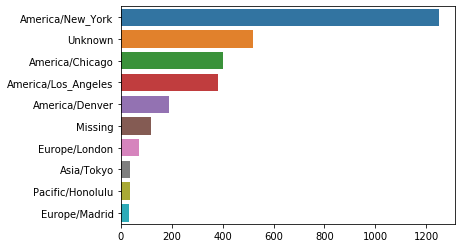

In [47]:
sns.barplot(y=subset.index, x=subset.values)

The a field contains information about the browser, device, or application used to
perform the URL shortening

In [51]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [61]:
frame.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [52]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [62]:
frame['a'][5]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [64]:
frame['a'][5].split()

['Mozilla/5.0',
 '(Windows',
 'NT',
 '6.1;',
 'WOW64)',
 'AppleWebKit/535.11',
 '(KHTML,',
 'like',
 'Gecko)',
 'Chrome/17.0.963.79',
 'Safari/535.11']

In [65]:
frame['a'][5].split()[0]

'Mozilla/5.0'

Parsing all of the interesting information in these “agent” strings may seem like a
daunting task. One possible strategy is to split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user
behavior:

In [66]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [67]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [68]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Now, suppose you wanted to decompose the top time zones into Windows and nonWindows users. As a simplification, let’s say that a user is on Windows if the string
'Windows' is in the agent string. Since some of the agents are missing, we’ll exclude
these from the data:

In [69]:
cframe = frame[frame.a.notnull()]

We want to then compute a value for whether each row is Windows or not:

In [71]:
cframe.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [75]:
import numpy as np

In [76]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
cframe.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u,os
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991,Windows
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php,Not Windows
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...,Windows
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html,Not Windows
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...,Windows


In [80]:
cframe['os'].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

Then, you can group the data by its time zone column and this new list of operating
systems:

In [81]:
by_tz_os = cframe.groupby(['tz','os'])

In [82]:
by_tz_os

The group counts, analogous to the value_counts function, can be computed with
size. This result is then reshaped into a table with unstack:

In [83]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [84]:
type(agg_counts)

pandas.core.frame.DataFrame

In [86]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Finally, let’s select the top overall time zones. To do so, I construct an indirect index
array from the row counts in agg_counts:

In [88]:
indexer_axis0 = agg_counts.sum(0) # Sum over rows.
indexer_axis0

os
Not Windows    1194.0
Windows        2246.0
dtype: float64

In [90]:
indexer_axis1 = agg_counts.sum(1) # Sum over columns.
indexer_axis1

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

In [93]:
type(indexer_axis1)

pandas.core.series.Series

In [91]:
# Use to sort in ascending order.
indexer_axis1 = agg_counts.sum(1).argsort()

In [92]:
indexer_axis1[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

I use take to select the rows in that order, then slice off the last 10 rows (largest
values):

In [105]:
count_subset = agg_counts.take(indexer_axis1[-10:])

In [106]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas has a convenience method called nlargest that does the same thing:

In [107]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Then, as shown in the preceding code block, this can be plotted in a bar plot; I’ll
make it a stacked bar plot by passing an additional argument to seaborn’s barplot
function.

In [108]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [109]:
# Rearrange the data for plotting.
count_subset = count_subset.stack()

In [110]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [111]:
type(count_subset)

pandas.core.series.Series

In [112]:
count_subset.name = 'total'

In [114]:
count_subset = count_subset.reset_index()

In [115]:
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


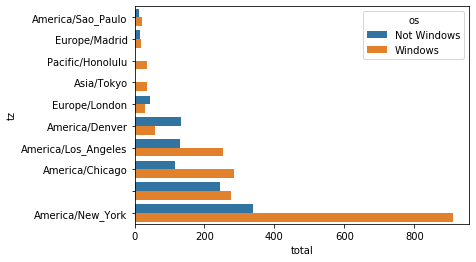

In [117]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

The plot doesn’t make it easy to see the relative percentage of Windows users in the
smaller groups, so let’s normalize the group percentages to sum to 1:

In [119]:
count_subset.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


In [124]:
def norm_total(group):
    group['normed_total'] = group.total/group.total.sum()
    return group

In [126]:
results = count_subset.groupby('tz').apply(norm_total)

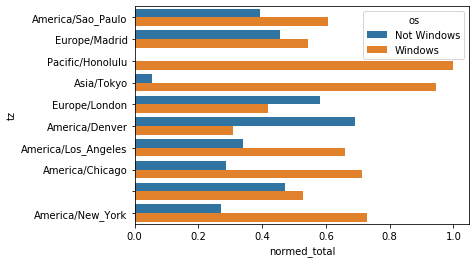

In [127]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

We could have computed the normalized sum more efficiently by using the trans
form method with groupby:

In [128]:
g = count_subset.groupby('tz')

In [129]:
results2 = count_subset.total/g.total.transform('sum')

# 14.2 MovieLens 1M Dataset

GroupLens Research provides a number of collections of movie ratings data collected
from users of MovieLens in the late 1990s and early 2000s. The data provide movie
ratings, movie metadata (genres and year), and demographic data about the users
(age, zip code, gender identification, and occupation). Such data is often of interest in
the development of recommendation systems based on machine learning algorithms.
While we do not explore machine learning techniques in detail in this book, I will
show you how to slice and dice datasets like these into the exact form you need.

The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on
4,000 movies. It’s spread across three tables: ratings, user information, and movie
information. After extracting the data from the ZIP file, we can load each table into a
pandas DataFrame object using pandas.read_table:

In [130]:
import pandas as pd

In [132]:
# Make display smaller.
pd.options.display.max_rows = 10

In [146]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [136]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [137]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


You can verify that everything succeeded by looking at the first few rows of each
DataFrame with Python’s slice syntax:

In [147]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [139]:
type(users)

pandas.core.frame.DataFrame

In [140]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [141]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Note that ages and occupations are coded as integers indicating groups described in
the dataset’s README file. Analyzing the data spread across three tables is not a sim‐
ple task; for example, suppose you wanted to compute mean ratings for a particular
movie by sex and age. As you will see, this is much easier to do with all of the data
merged together into a single table. Using pandas’s merge function, we first merge
ratings with users and then merge that result with the movies data. pandas infers
which columns to use as the merge (or join) keys based on overlapping names:

In [148]:
data = pd.merge(pd.merge(ratings, users), movies)

In [149]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [150]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

To get mean movie ratings for each film grouped by gender, we can use the
pivot_table method:

In [151]:
mean_rating = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [152]:
mean_rating[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


I first filter down to movies that
received at least 250 ratings (a completely arbitrary number); to do this, I then group
the data by title and use size() to get a Series of group sizes for each title:

In [154]:
ratings_by_title = data.groupby('title').size()

In [155]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [156]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [158]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

The index of titles receiving at least 250 ratings can then be used to select rows from
mean_ratings:

In [159]:
# Select rows on the index.
mean_rating = mean_rating.loc[active_titles]

In [160]:
mean_rating

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


To see the top films among female viewers, we can sort by the F column in descend‐
ing order:

In [161]:
top_F_rating = mean_rating.sort_values(by='F', ascending=False)
top_F_rating

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### Measuring Rating Disagreement

Suppose you wanted to find the movies that are most divisive between male and
female viewers. One way is to add a column to mean_ratings containing the difference in means, then sort by that:

In [162]:
mean_rating['diff'] = mean_rating['M'] - mean_rating['F']

Sorting by 'diff' yields the movies with the greatest rating difference so that we can
see which ones were preferred by women:

In [163]:
sorted_by_diff = mean_rating.sort_values(by='diff')

In [165]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the mov‐
ies preferred by men that women didn’t rate as highly:

In [166]:
# Reverse order of the rows, then take the first 10 rows.
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Suppose instead you wanted the movies that elicited the most disagreement among
viewers, independent of gender identification. Disagreement can be measured by the
variance or standard deviation of the ratings:

In [172]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [174]:
# Standard deviation of rating grouped by title.
rating_std_by_title = data.groupby('title')['rating'].std()

In [176]:
rating_std_by_title[:5]

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [178]:
# Filter down to active_titles.
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [179]:
# Order series by value in descending order.
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

You may have noticed that movie genres are given as a pipe-separated (|) string. If
you wanted to do some analysis by genre, more work would be required to transform
the genre information into a more usable form.

## 14.3 US Baby Names 1880–2010

The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. Hadley Wickham, an
author of several popular R packages, has often made use of this dataset in illustrating
data manipulation in R.

We need to do some data wrangling to load this dataset. There are many things you might want to do with the dataset:

    • Visualize the proportion of babies given a particular name (your own, or another
    name) over time
    • Determine the relative rank of a name
    • Determine the most popular names in each year or the names whose popularity
    has advanced or declined the most
    • Analyze trends in names: vowels, consonants, length, overall diversity, changes in
    spelling, first and last letters
    • Analyze external sources of trends: biblical names, celebrities, demographic
    changes
    
With the tools in this book, many of these kinds of analyses are within reach, so I will
walk you through some of them.

As of this writing, the US Social Security Administration makes available data files,
one per year, containing the total number of births for each sex/name combination.

With the tools in this book, many of these kinds of analyses are within reach, so I will
walk you through some of them.

As this is already in a nicely comma-separated form, it can be loaded into a Data‐
Frame with pandas.read_csv:

In [180]:
import pandas as pd

In [181]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [182]:
type(names1880)

pandas.core.frame.DataFrame

In [184]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files only contain names with at least five occurrences in each year, so for sim‐
plicity’s sake we can use the sum of the births column by sex as the total number of
births in that year:

In [189]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to assemble
all of the data into a single DataFrame and further to add a year field. You can do this
using pandas.concat:

In [192]:
years = range(1880,2011)

pieces = []
columns = ['names', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [199]:
len(pieces)

131

In [200]:
2011-1880

131

In [201]:
# Concatenate everything into a single DataFrame.
names = pd.concat(pieces, ignore_index=True)

namesThere are a couple things to note here. First, remember that concat glues the Data‐
Frame objects together row-wise by default. Secondly, you have to pass
ignore_index=True because we’re not interested in preserving the original row num‐
bers returned from read_csv. So we now have a very large DataFrame containing all
of the names data:

In [203]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


With this data in hand, we can already start aggregating the data at the year and sex
level using groupby or pivot_table:

In [204]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [205]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [206]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


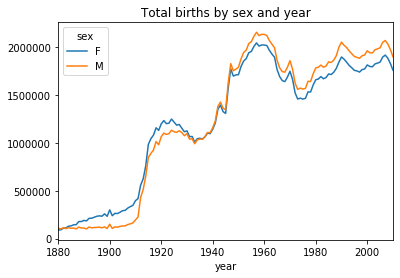

In [207]:
total_births.plot(title='Total births by sex and year')

Next, let’s insert a column prop with the fraction of babies given each name relative to
the total number of births. A prop value of 0.02 would indicate that 2 out of every
100 babies were given a particular name. Thus, we group the data by year and sex,
then add the new column to each group:

In [209]:
names.head()

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [212]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [213]:
names = names.groupby(['year','sex']).apply(add_prop)

The resulting complete dataset now has the following columns:

In [215]:
names.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


When performing a group operation like this, it’s often valuable to do a sanity check,
like verifying that the prop column sums to 1 within all the groups:

In [216]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Now that this is done, I’m going to extract a subset of the data to facilitate further
analysis: the top 1,000 names for each sex/year combination. This is yet another
group operation:

In [221]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [222]:
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

# Drop the group index, not needed.
top1000.reset_index(inplace=True, drop=True)

The resulting dataset is now quite a bit smaller:

In [223]:
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


We’ll use this Top 1,000 dataset in the following investigations into the data.

In [224]:
type(top1000)

pandas.core.frame.DataFrame

### Analyzing Naming Trends

With the full dataset and Top 1,000 dataset in hand, we can start analyzing various
naming trends of interest. Splitting the Top 1,000 names into the boy and girl por‐
tions is easy to do first:

In [225]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

Simple time series, like the number of Johns or Marys for each year, can be plotted
but require a bit of munging to be more useful. Let’s form a pivot table of the total
number of births by year and name:

In [227]:
total_births = top1000.pivot_table('births', index='year', columns='names', aggfunc=sum)

Now, this can be plotted for a handful of names with DataFrame’s plot method.

In [228]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [229]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF00180320>,
      dtype=object)

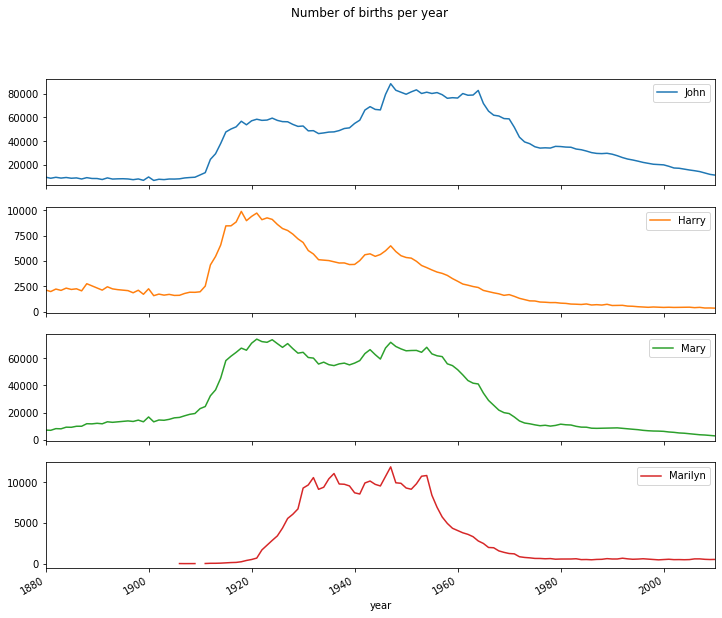

In [230]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

On looking at this, you might conclude that these names have grown out of favor
with the American population. But the story is actually more complicated than that,
as will be explored in the next section.

#### Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common
names for their children. This hypothesis can be explored and confirmed in the data.
One measure is the proportion of births represented by the top 1,000 most popular
names, which I aggregate and plot by year and sex:

In [231]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

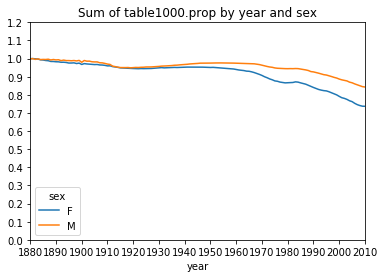

In [232]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

You can see that, indeed, there appears to be increasing name diversity (decreasing
total proportion in the top 1,000). Another interesting metric is the number of dis‐
tinct names, taken in order of popularity from highest to lowest, in the top 50% of
births. This number is a bit more tricky to compute. Let’s consider just the boy names
from 2010: